## Exploratory Data Analysis of Banking Data

The data is a subset of an open source Bank Marketing Data Set from the UCI ML repository: https://archive.ics.uci.edu/ml/citation_policy.html.

> This dataset is publicly available for research. The details are described in \[Moro et al., 2014].
> Please include this citation if you plan to use this database:
> \[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

**Questions to answer by the EDA**
1.  What is the distribution of marital status of clients ?   
2.  What is the longest duration of calls with the clients?
3.  What is the share of clients attracted in the source data?
4.  What are the mean values of numerical features among the attracted clients?
5.  What is the average call duration for the attracted clients?
6.  What is the average age among the attracted and unmarried clients?
7.  What is the average age and call duration for different types of client employment?
8.  What is the average age of clients who was part of a successful previous marketing campaign ?

## Import libraries & packages

In [1]:
import wget
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 6)

import warnings
warnings.filterwarnings('ignore')

from plotly.offline import init_notebook_mode
import plotly.express as px
init_notebook_mode(connected=True)

Specify precision parameter to show 2 decimal places instead of 6 (default)

In [2]:
pd.set_option('display.max_columns', 30)
pd.set_option("precision", 2)
pd.options.display.float_format = '{:.2f}'.format

**wget** module is used to download the zip file from the url.<br>
**zipfile** module is used to extract the files from the zip file.

In [3]:
# Download the File using wget

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/EDA_Pandas_Banking_L1/bank-additional.zip'
zip_folder = wget.download(url)

100% [............................................................................] 444572 / 444572

In [4]:
# Extract files from bank-additional.zip folder
with zipfile.ZipFile(zip_folder,mode='r') as zip_files: 
    zip_files.extractall() 

## Exploring the dataset

In [5]:
#Load Dataset

bank_df = pd.read_csv('bank-additional/bank-additional-full.csv',sep=';')

In [6]:
#Display first 5 rows
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [7]:
bank_df.shape 

#There are 41188 rows and 21 columns 

(41188, 21)

In [8]:
bank_df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

Input features (column names):

1.  `age` - client's age in years (numeric)
2.  `job` - type of job (categorical: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`)
3.  `marital` - marital status (categorical: `divorced`, `married`, `single`, `unknown`)
4.  `education` - client's education (categorical: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`)
5.  `default` - has credit in default? (categorical: `no`, `yes`, `unknown`)
6.  `housing` - has housing loan? (categorical: `no`, `yes`, `unknown`)
7.  `loan` - has personal loan? (categorical: `no`, `yes`, `unknown`)
8.  `contact` - contact communication type (categorical: `cellular`, `telephone`)
9.  `month` - last contact month of the year (categorical: `jan`, `feb`, `mar`, ..., `nov`, `dec`)
10. `day_of_week` - last contact day of the week (categorical: `mon`, `tue`, `wed`, `thu`, `fri`)
11. `duration` - last contact duration, in seconds (numeric).
12. `campaign` - number of contacts performed and for this client during this campaign (numeric, includes the last contact)
13. `pdays` - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the client has not been previously contacted)
14. `previous` - number of contacts performed for this client before this campaign (numeric)
15. `poutcome` - outcome of the previous marketing campaign (categorical: `failure`, `nonexistent`, `success`)
16. `emp.var.rate` - employment variation rate, quarterly indicator (numeric)
17. `cons.price.idx` - consumer price index, monthly indicator (numeric)
18. `cons.conf.idx` - consumer confidence index, monthly indicator (numeric)
19. `euribor3m` - euribor 3 month rate, daily indicator (numeric)
20. `nr.employed` - number of employees, quarterly indicator (numeric)

Output feature (desired target):

21. `y` - has the client subscribed a term deposit? (binary: `yes`,`no`)

In [9]:
bank_df.info()

#The dataset is full, so there is no need to fill the gaps. 
#The dataset contains 5 integer (int64), 5 real (float64) and 11 categorical and binary (object) features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
# General Overview of the computation in data of numeric features

bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [11]:
# General Overview of the computation in data of non-numeric features
bank_df.describe(include =['object'])

# Average client refers to administrative staff (job = admin.),
#is married (marital = married) and has a university degree (education = university.degree).

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


**What is the distribution of marital status of clients ?**

In [12]:
bank_df['marital'].value_counts(normalize=True)

# 61% (0.61) of clients are married,
# which must be taken into account when planning marketing campaigns to manage deposit operations.

married    0.61
single     0.28
divorced   0.11
unknown    0.00
Name: marital, dtype: float64

**What is the longest duration of calls with the clients?**

In [13]:
bank_df.sort_values(by='duration',ascending=False).head(10)[['month','duration','day_of_week']]

# The longest calls exceed one hour, as the value duration is more than 3600 seconds or 1 hour.
# At the same time, it usually was from weekdays (day_of_weeabsk) and, especially, in November and August (month).

,month,duration,day_of_week
24091,nov,4918,mon
22192,aug,4199,thu
40537,aug,3785,fri
13820,jul,3643,thu
7727,may,3631,fri
36043,may,3509,tue
19632,aug,3422,thu
2313,may,3366,tue
20996,aug,3322,thu
24043,oct,3284,mon


In [14]:
bank_df.sort_values(by=['age','duration'],ascending=[True,False]).head(10)[['age','duration']]

# Youngest customers are at the age of 17 & 18,and the call duration is limited to such,
# which indicates the ineffectiveness of long-term interaction with such clients.

,age,duration
38274,17,896
37579,17,498
37140,17,432
37539,17,182
37558,17,92
37125,18,642
37626,18,628
41084,18,600
37955,18,563
40379,18,561


In [15]:
bank_df.apply(np.max)

# The oldest client is 98 years old (age = 98)
# The number of contacts with one of the customers reached 56 (campaign = 56).
# Majority of the clients have either personal or housing loan. (housing = yes, loan = yes)
# The most used communication type is via telephone (contact = telephone).

age                      98
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               4918
campaign                 56
pdays                   999
previous                  7
poutcome            success
emp.var.rate           1.40
cons.price.idx        94.77
cons.conf.idx        -26.90
euribor3m              5.04
nr.employed         5228.10
y                       yes
dtype: object

In [16]:
# Convert the values in column y for aggregation
d = {"no": 0, "yes": 1}
bank_df["y"] = bank_df["y"].map(d)

**What is the share of clients attracted in our DataFrame?**

In [17]:
print("Share of attracted clients =", '{:.1%}'.format(bank_df["y"].mean()))

# 11.3% is not a good indicator for the bank and might need to have new campaign strategy to attract clients.

Share of attracted clients = 11.3%


**What are the mean values ​​of numerical features among the attracted clients?**

In [18]:
bank_df[bank_df['y'] ==1].mean()

# The average age of the attracted client is 40 years and needed 2 calls to attract them.

age                40.91
duration          553.19
campaign            2.05
pdays             792.04
previous            0.49
emp.var.rate       -1.23
cons.price.idx     93.35
cons.conf.idx     -39.79
euribor3m           2.12
nr.employed      5095.12
y                   1.00
dtype: float64

**What is the average call duration for the attracted clients?**

In [19]:
acd = round(bank_df[bank_df["y"] == 1]["duration"].mean(), 2)
acd_in_min = acd // 60
print("Average call duration for attracted clients =", acd_in_min, "min", int(acd) % 60, "sec")

Average call duration for attracted clients = 9.0 min 13 sec


**What is the average age of attracted (y == 1) and unmarried ('marital' == 'single') clients?**

In [20]:
print("Average age of attracted and single clients =", int(bank_df[(bank_df["y"] == 1) & (bank_df["marital"] == "single")]["age"].mean()), "years")

Average age of attracted and single clients = 31 years


In [21]:
# Overview of attracted clients and marital status
pd.crosstab(bank_df['y'],bank_df['marital'])

# The number of attracted married clients is 2532.

marital,divorced,married,single,unknown
y,,,,
0,4136,22396,9948,68
1,476,2532,1620,12


**What is the average age and call duration for different types of client employment?**

In [22]:
bank_df.pivot_table(values=["age", "duration"],index=["job"],aggfunc = "mean")

,age,duration
job,,
admin.,38.19,254.31
blue-collar,39.56,264.54
entrepreneur,41.72,263.27
housemaid,45.50,250.45
management,42.36,257.06
retired,62.03,273.71
self-employed,39.95,264.14
services,37.93,258.40
student,25.89,283.68


**What is the average age of clients who was part of a successful previous marketing campaign ?**

In [23]:
print('Average age of clients who was part of a successful previous marketing campaign = ',int(bank_df[bank_df['poutcome']=='success']['age'].mean()),'years')

Average age of clients who was part of a successful previous marketing campaign =  42 years


## Data Visualization

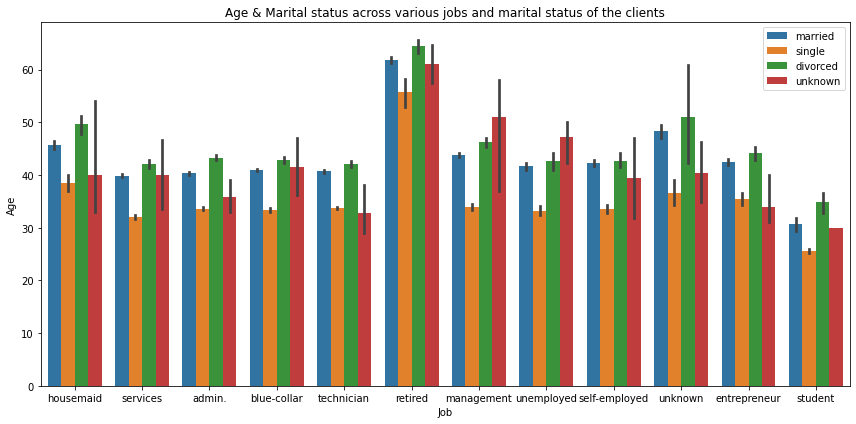

In [24]:
#Overview of distribution of age across multiple jobs and the marital status of clients.
fig = sns.barplot(data=bank_df,x='job',y='age',hue='marital')
fig.set(xlabel = 'Job', ylabel = 'Age', title ='Age & Marital status across various jobs and marital status of the clients')

plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

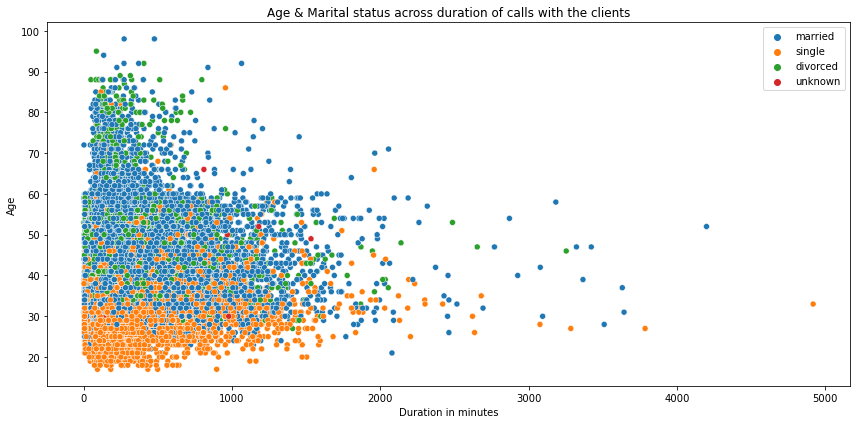

In [25]:
#Overview of distribution of duration of calls across age and the marital status of clients.
fig = sns.scatterplot(data=bank_df,x='duration',y='age',hue='marital')
fig.set(xlabel = 'Duration in minutes', ylabel = 'Age', title ='Age & Marital status across duration of calls with the clients')

plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

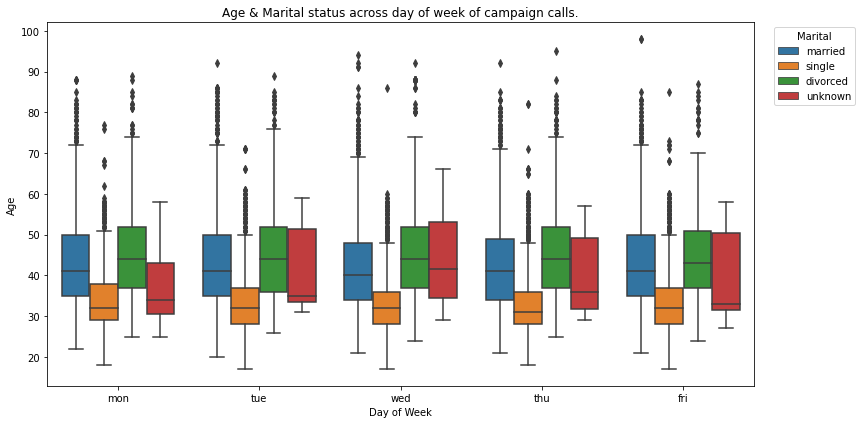

In [26]:
#Overview of distribution of day of week of campaign calls across age and the marital status of clients.
fig = sns.boxplot(data=bank_df,x ='day_of_week', y='age' ,hue='marital')
fig.set(xlabel = 'Day of Week', ylabel = 'Age', title ='Age & Marital status across day of week of campaign calls.')

plt.legend(loc='upper right',bbox_to_anchor= (1.15,1),title="Marital")
plt.tight_layout()
plt.show()

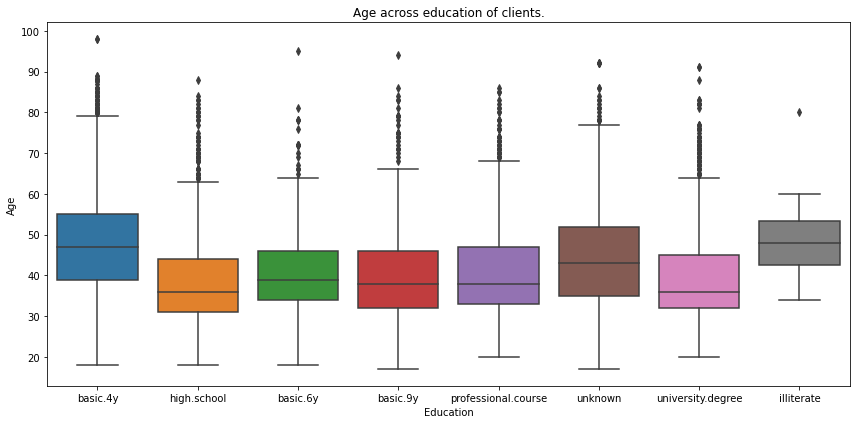

In [27]:
#Overview of distribution of education across age of clients.
fig = sns.boxplot(data=bank_df,x ='education', y='age')
fig.set(xlabel = 'Education', ylabel = 'Age', title ='Age across education of clients.')

plt.tight_layout()
plt.show()

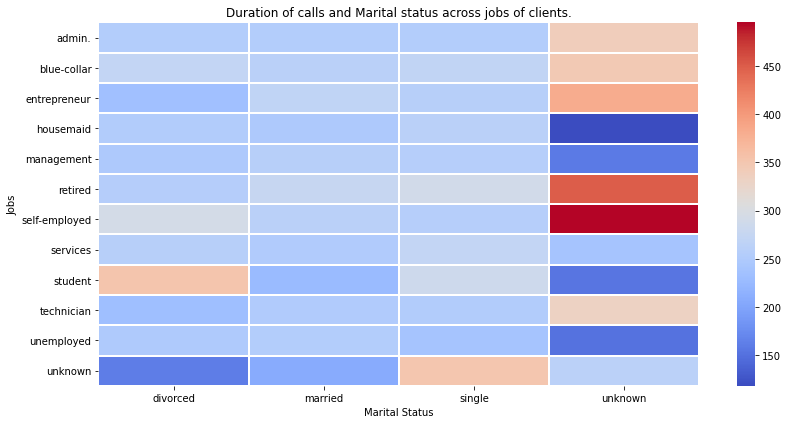

In [28]:
#Overview of heatmap of duration of calls and the marital status across jobs of clients.

fig = sns.heatmap(bank_df.pivot_table(values="duration",index="job",columns='marital',aggfunc = "mean"),cmap='coolwarm',linecolor='white',linewidths=1)
fig.set(xlabel = 'Marital Status', ylabel = 'Jobs', title ='Duration of calls and Marital status across jobs of clients.')

plt.tight_layout()
plt.show()